In [10]:
import pandas as pd
from scipy import stats
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Overview

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the Puestions are intentionally phrased in a vague way. It is your job to reword these as more precise Puestions that could be tested.

## Q1-Has the network latency gone up since we switched internet service providers?

$H_{0}$ - Network latency (ping) has not increased since changing ISPs

$H_{a}$ - Ping has increased since changing 
ISPs

$\mu_{Provider A} \le \mu_{Provider B}$

$H_{0}$| $H_{0}$ is True | $H_{0}$ is false
---|---|---
Accept $H_{0}$ | Latency went up and we said it did | Type I: Latency didn't go up and we said it did
Reject $H_{0}$ | Type II: Latency went up when we said it didn't| Latency did not increase and we said it didn't
 


## Q2 - Is the website redesign any good?

$H_{0}: \mu_{0} \ge \mu_{1}$ - Visitors spend the same amount of time or less on the old_site vs. the new site

$H_{a}: \mu_{0} < \mu_{1}$ - Visitors spend more time on the new site than on the old site

$\mu_0 =$ page views before site redesign

$\mu_1 = $ page views after site redesign

$H_{0}$| $H_{0}$ is True | $H_{0}$ is false
---|---|---
Accept $H_{0}$ | Correctly conclude that the website's redesign has lead to an increase in customer satisfaction scores | Type I: Incorrectly conclude that the redesign has lead to an increase in customer satisfaction scores when it does not appear to be correlated
Reject $H_{0}$ | Type II: incorrectly conclude that an increase in customer satisfaction scores cannot attributed to the website redesign | correctly conclude that the increase in customer satisfaction scores cannot be attributed to an increase in customer satisfaction scores

## Q4-Is our television ad driving more sales?

$H_{0}$- Our television ad cannot be linked to a statistically significant increase in sales
$H_{a}$- Our television ad can be linked to a statistically significant increase in sales

$H_{0}$| $H_{0}$ is True | $H_{0}$ is false
---|---|---
Accept $H_{0}$ | |
Reject $H_{0}$ | |

## Part 2 - T-Test

## Q1 -Answer with the type of test you would use (assume normal distribution):



Independent T-Test 
```python
scipy.stats.ttest_1samp
```

### P2 - Are adults who drink milk taller than adults who dont drink milk?

You would use an independent t-test (2 sanple)
```python
scipy.stats.ttest_ind
```

### P3 - Is the the price of gas higher in texas or in new mexico?



You would use an independent t-test (2 sanple)
```python
scipy.stats.ttest_ind
```

## P4-Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA
```python
scipy.stats.f_oneway
```

## Q2 - Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [11]:
#setup & generate samples
n_1 = 40
mu_1 = 90
std_1 = 15
n_2 = 50
mew_2 = 100
std_2 = 20
alpha = .05
gen_1 = stats.norm(90,15)
gen_2 = stats.norm(100,20)
sales_1 = gen_1.rvs(40)
sales_2 = gen_2.rvs(50)

#### Step 1: Plot distributions

(array([ 5.,  5.,  8.,  5., 12.,  5.,  6.,  2.,  1.,  1.]),
 array([ 59.70319006,  69.69226259,  79.68133512,  89.67040765,
         99.65948018, 109.64855271, 119.63762524, 129.62669777,
        139.61577031, 149.60484284, 159.59391537]),
 <BarContainer object of 10 artists>)

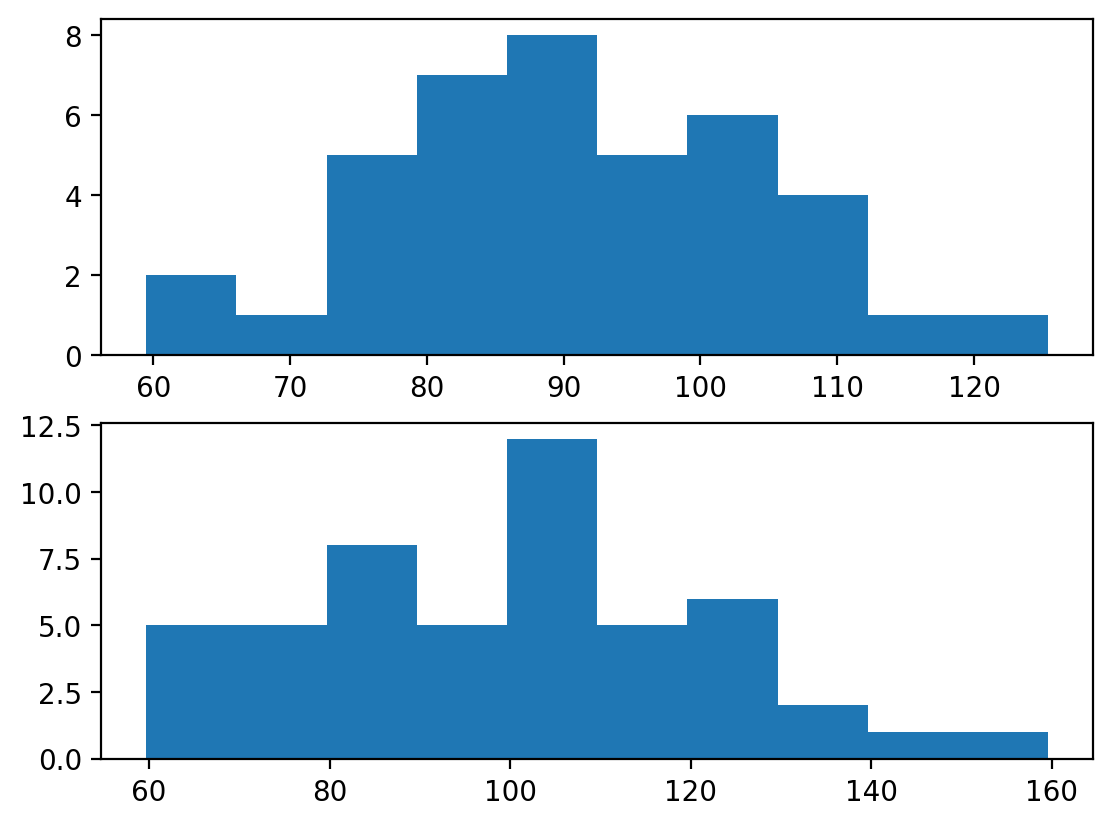

In [12]:
plt.subplot(211)
plt.hist(sales_1)
plt.subplot(212)
plt.hist(sales_2)

2. Establish Hypotheses

Hypothesis | Assumption
--- | ---
$H_{0}$ | $\mu_{1} = \mu_{2}$ |
|$H_{a}:$ | $\ \mu_{1} \neq \mu_{2}$|

3. verify assumptions
    a. Independent: Yes
    b. Normally Distributed? yep
    c. Equal variance

In [13]:
print(sales_1.var())
print(sales_2.var())


195.2056149625733
493.98216165389226


Uhhhhhhhh....

In [14]:
t,p = stats.ttest_ind(sales_1,sales_2,equal_var=False)
t,p

(-2.2147837290993935, 0.029489323140897004)

REJECT THE NULL HYPOTHESIS

## Question 3 - Load the mpg dataset and use it to answer the following questions:

In [15]:
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### P1 - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

<AxesSubplot:title={'center':'2008'}, xlabel='avg_fe', ylabel='Count'>

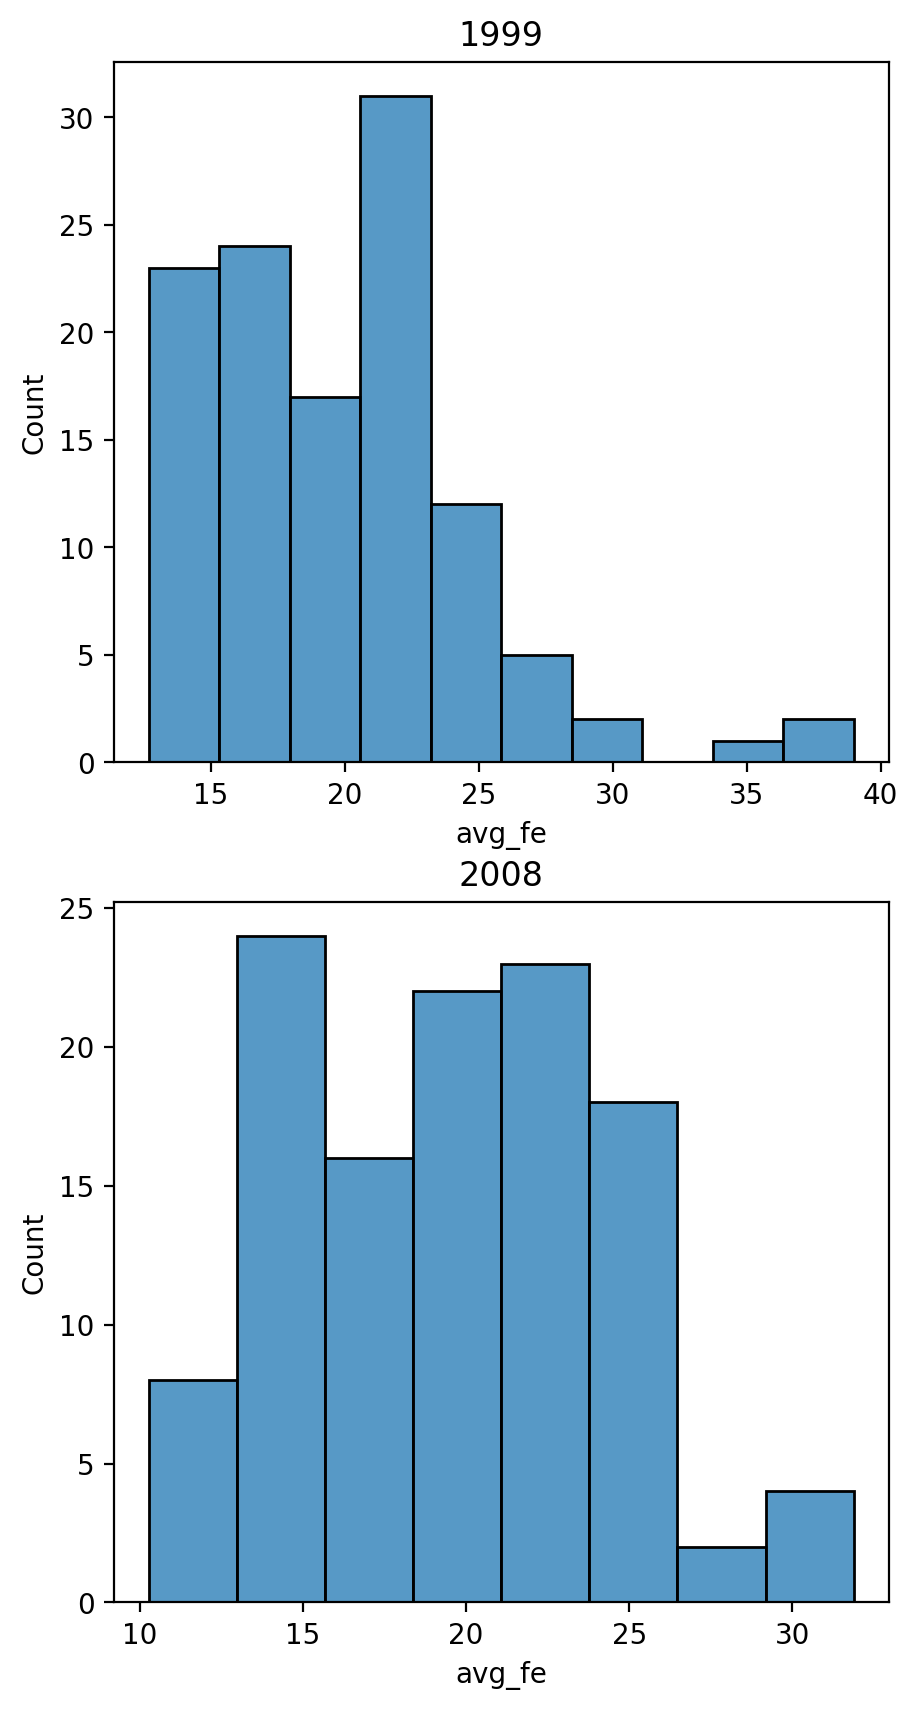

In [16]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']],axis=1)
ninety_nine = mpg[mpg.year == 1999]['avg_fe']
oh_eight = mpg[mpg.year == 2008]['avg_fe']
plt.figure(figsize=(5,10))
plt.subplot(211)
sns.histplot(data=ninety_nine)
plt.title('1999')
plt.subplot(212)
plt.title('2008')
sns.histplot(data=oh_eight)

#### Make hypothesis

  H | A  
---|---
$H_0$ | $\mu_{99} = \mu_{08}$
$H_a$ | $\mu_{99} \neq \mu_{08}$   

#### Set Alpha

In [17]:
alpha = .05

#### Verify Assumptions
Independent Samples: Yes!
Normal distribution: Kinda sorta!
Variance:

In [22]:
stats.levene(ninety_nine,oh_eight)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [27]:
t,p = stats.ttest_ind(ninety_nine,oh_eight)
if(alpha < p and t < 0):
    s = "reject null hypothesis"
else:
    s = 'failed to reject null hypothesis'
s

'failed to reject null hypothesis'

#### P2 -Are compact cars more fuel-efficient than the average car?

#### Distribution

Hypotheses
H | T
--|--
$H_0$ | $\mu_{Co} \leq \mu$
$H_a$ | $\mu_{Co} = \mu$

Assumptions
See Above

(array([ 9., 13., 14.,  5.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([18.75      , 20.64642857, 22.54285714, 24.43928571, 26.33571429,
        28.23214286, 30.12857143, 32.025     , 33.92142857, 35.81785714,
        37.71428571]),
 <BarContainer object of 10 artists>)

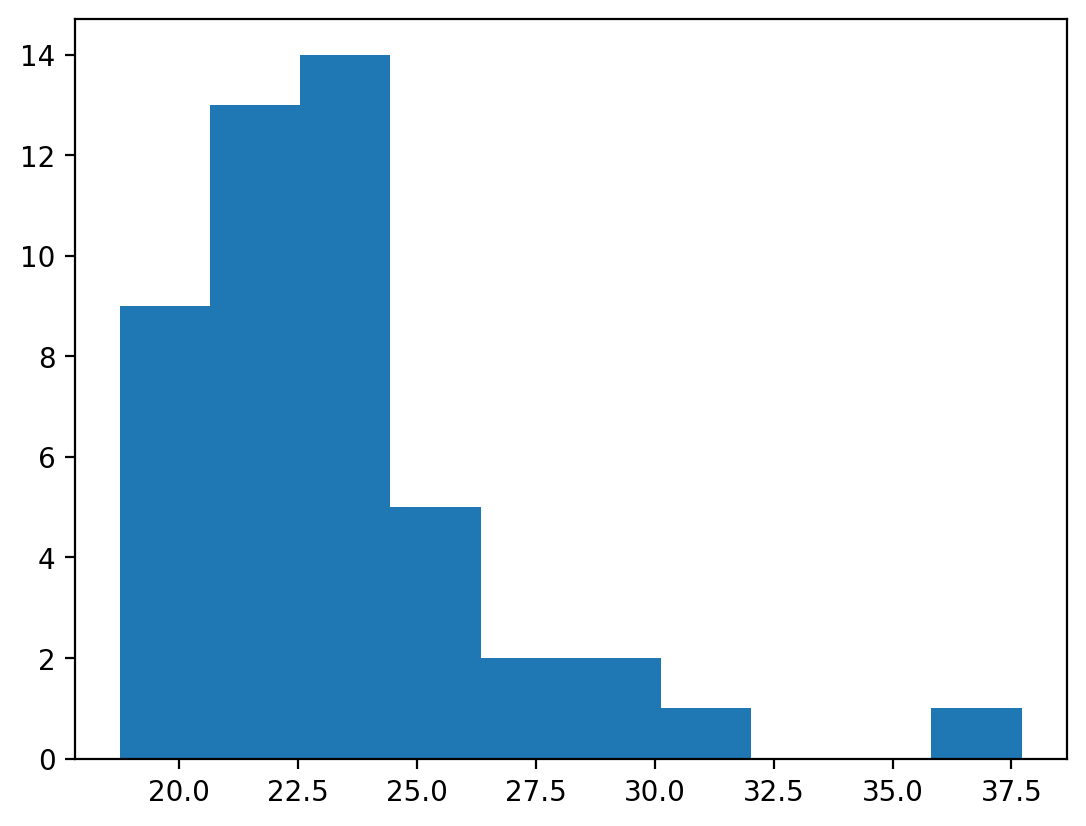

In [29]:
compacts = mpg[mpg['class'] == 'compact'].avg_fe
mu_all = mpg.avg_fe.mean()
plt.hist(compacts)

In [32]:
t,p = stats.ttest_1samp(compacts, mu_all)
t,p/2

(7.512360093161354, 7.808833174403864e-10)

In [33]:
f'because p/2 is {p/2:.11f} and {t} > 0, we reject the null hypothesis'

'because p/2 is 0.00000000078 and 7.512360093161354 > 0, we reject the null hypothesis'

P3 - Do manual cars get better gas mileage than automatic cars?

2 values
1 tail
Hypothesis | Text1
---|---
$H_0$| $\mu_{man} \leq \mu_{aut}$
$H_a$ | $\mu_{man} > \mu_{aut}$

<AxesSubplot:xlabel='avg_fe', ylabel='Density'>

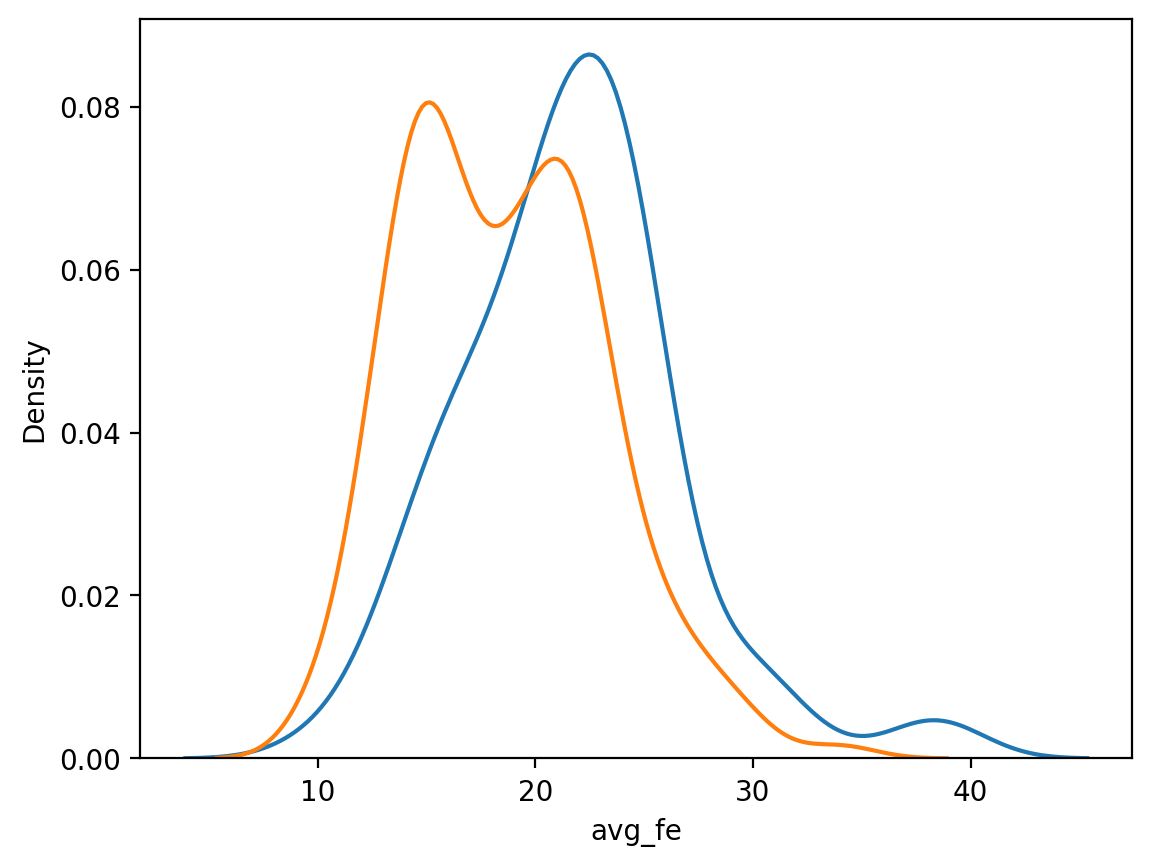

In [50]:
manuals = mpg[mpg.trans.str.startswith('m')].avg_fe
autos = mpg[mpg.trans.str.startswith('a')].avg_fe
sns.kdeplot(data=manuals)
sns.kdeplot(data=autos,legend=True)

* Normal distribution? Enough
* Independent? Sure are!
* Variance?

In [51]:
stats.levene(autos,manuals)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

Variance is good! let's do this thing!!!


In [54]:
t,p = stats.ttest_ind(autos,manuals)
if t < 0 and p/2 < alpha:
    returnstr = f'because {p/2:.11f} < {alpha} and {t} < 0, we reject the null hypothesis'
else:
    returnstr = f'because {p/2:.11f} > {alpha} and {t} > 0, we failed to  the null hypothesis'
returnstr

'because 0.00000275523 < 0.05 and -4.652577547151351 > 0, we reject the null hypothesis'